# KNN from scratch

In [146]:
import numpy as np 
from collections import Counter


class KNN :
    def __init__(self, X , y ,k : int , problem : str):

        self.X = X
        self.y = y
        self.k= k 
        self.problem = problem

    # calculate euclidienne distance
    def euclidienne_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

    # helper function to predict label of one sample 
    def _predict(self,x):

        distances = [self.euclidienne_distance(x, x1) for x1 in self.X]


        # sort distances from min to max and save indices
        indices = np.argsort(distances)

        #  k nearest neighbours
        k_nearest = indices[:k]

        labels = [self.y[i] for i in k_nearest]

        if problem =='classification' :

            # its a classifier => most common labels
            most_common = Counter(labels).most_common(1) # it returns the most commun label in this format [(label , occurence)
            return most_common[0][0] # to get just the label

        elif problem =='regression' : 
            # its a regressor => mean labels
            return np.mean(labels) # to get mean of labels
        else :
            print("You can choose just : regression or classification")


    def predict(self,X):
        predicted_labels=[self._predict(x) for x in X]
        return np.array(predicted_labels)

    def score(self,X_test,y_test):

        if self.problem == 'regression' :
            predicted = self.predict(X_test)  
            return r2_score(y_test, predicted)

        elif self.problem == 'classification' :
            predicted = self.predict(X_test) 
            return accuracy_score(y_test, predicted) * 100


# Data for classification

## 1) Train data

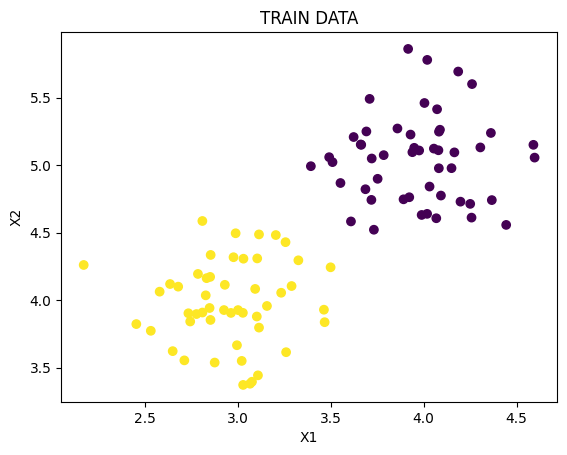

In [147]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

num_points = 50

# Cluster 1
mean1 = [3, 4]  
cov1 = [[0.1, 0], [0, 0.1]]  
cluster1 = np.random.multivariate_normal(mean1, cov1, num_points)

# Cluster 2
mean2 = [4, 5]  
cov2 = [[0.1, 0], [0, 0.1]]  
cluster2 = np.random.multivariate_normal(mean2, cov2, num_points)


labels_cluster1 = np.ones((num_points, 1))  
labels_cluster2 = np.zeros((num_points, 1))  


data = np.concatenate((np.concatenate((cluster1, labels_cluster1), axis=1),
                                   np.concatenate((cluster2, labels_cluster2), axis=1)))


np.random.shuffle(data)


X = data[:, :-1]  
y = data[:, -1]   

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('TRAIN DATA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


## 2) Test data by changing random seed  = 2

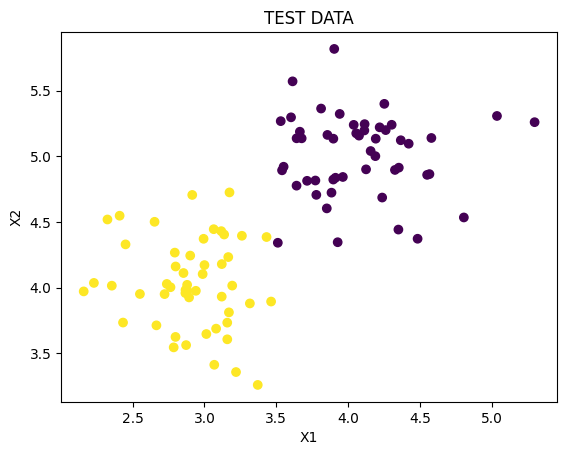

In [148]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2)

num_points = 50

# Cluster 1
mean1 = [3, 4]  
cov1 = [[0.1, 0], [0, 0.1]]  
cluster1 = np.random.multivariate_normal(mean1, cov1, num_points)

# Cluster 2
mean2 = [4, 5]  
cov2 = [[0.1, 0], [0, 0.1]]  
cluster2 = np.random.multivariate_normal(mean2, cov2, num_points)


labels_cluster1 = np.ones((num_points, 1))  
labels_cluster2 = np.zeros((num_points, 1))  


data_test = np.concatenate((np.concatenate((cluster1, labels_cluster1), axis=1),
                                   np.concatenate((cluster2, labels_cluster2), axis=1)))


np.random.shuffle(data_test)


X_test = data_test[:, :-1]  
y_test = data_test[:, -1]   

# Plot the clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('TEST DATA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Predictions

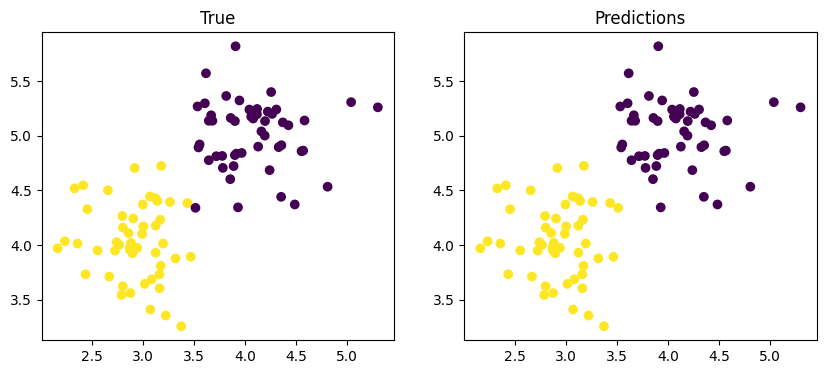

In [149]:
model = KNN( X , y ,k =3 , problem = "classification")

y_pred = model.predict(X_test)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('True')


plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title('Predictions')

plt.show()

In [150]:
print(f"Accuracy Score: {model.score(X_test,y_test)} %")

Accuracy Score: 99.0 %


## Data for Regression

## 1) Train data

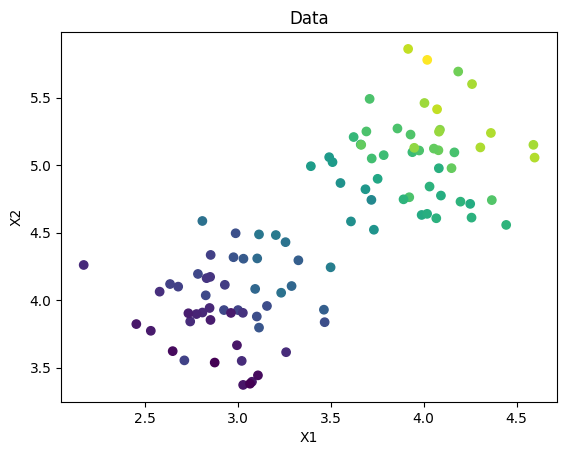

In [154]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_points = 50

# Cluster 1
mean1 = [3, 4]
cov1 = [[0.1, 0], [0, 0.1]]
cluster1 = np.random.multivariate_normal(mean1, cov1, num_points)

# Cluster 2
mean2 = [4, 5]
cov2 = [[0.1, 0], [0, 0.1]]
cluster2 = np.random.multivariate_normal(mean2, cov2, num_points)

# function to create output y
def generate_y(X):
    return 2*X[:, 0] + 3*X[:, 1] + np.random.normal(0, 0.5, X.shape[0])

# generate y for each cluster
y_cluster1 = generate_y(cluster1)
y_cluster2 = generate_y(cluster2)

# create data
data_cluster1 = np.concatenate((cluster1, y_cluster1.reshape(-1, 1)), axis=1)
data_cluster2 = np.concatenate((cluster2, y_cluster2.reshape(-1, 1)), axis=1)
data = np.concatenate((data_cluster1, data_cluster2), axis=0)

# Shuffle the data
np.random.shuffle(data)

# Separate features X , y
X = data[:, :-1]
y = data[:, -1]

# Plot the data
plt.scatter(X[:, 0], X[:, 1] ,c = y)
plt.title('Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


## 2) Test data by changing random seed = 2

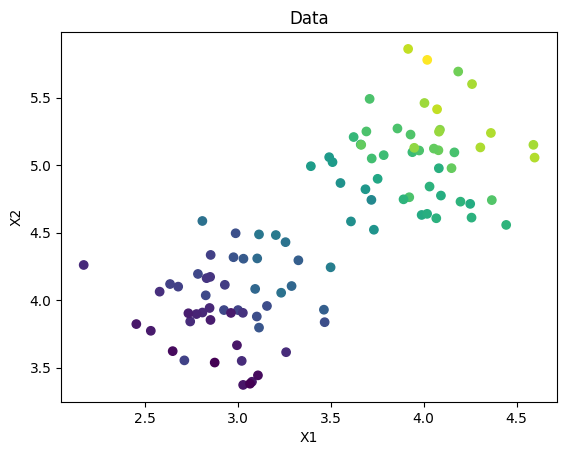

In [159]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

num_points = 50

# Cluster 1
mean1 = [3, 4]
cov1 = [[0.1, 0], [0, 0.1]]
cluster1 = np.random.multivariate_normal(mean1, cov1, num_points)

# Cluster 2
mean2 = [4, 5]
cov2 = [[0.1, 0], [0, 0.1]]
cluster2 = np.random.multivariate_normal(mean2, cov2, num_points)

# function to create y
def generate_y(X):
    return 2*X[:, 0] + 3*X[:, 1] + np.random.normal(0, 0.5, X.shape[0])

# Generate y
y_cluster1 = generate_y(cluster1)
y_cluster2 = generate_y(cluster2)

# Creatre data
data_cluster1 = np.concatenate((cluster1, y_cluster1.reshape(-1, 1)), axis=1)
data_cluster2 = np.concatenate((cluster2, y_cluster2.reshape(-1, 1)), axis=1)
data = np.concatenate((data_cluster1, data_cluster2), axis=0)

# Shuffle the data
np.random.shuffle(data)

# Separate features X,y
X_test = data[:, :-1]
y_test = data[:, -1]

# Plot the data
plt.scatter(X[:, 0], X[:, 1] ,c = y)
plt.title('Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Predictions

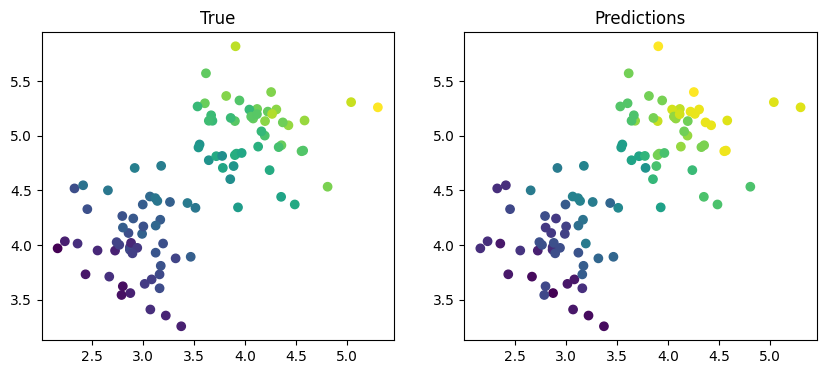

In [156]:
model = KNN( X , y ,k =3 , problem = "regression")

y_pred = model.predict(X_test)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('True')


plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title('Predictions')

plt.show()

In [158]:
print(f"R2 = {model.score(X_test,y_test):.3f}")

R2 = 0.906
